# TO DO
- Function to add dates in between using generator
- Prediction

# Imports

In [290]:
import psutil
import datetime
from datetime import datetime, timedelta 
import time
from pandas import DataFrame
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates
import seaborn as sns
sns.set()
import numpy as np
import statsmodels.api as sm
register_matplotlib_converters()

In [271]:
data = pd.read_csv('data/data.csv')
data['year'] = '2019'
data['timestamp'] = data['date'].astype(str)+'-'+data['month'].astype(str)+'-'+data['year'].astype(str)+' '+data['hour'].astype(str)+':'+data['min'].astype(str)+':00'

In [272]:
# data

In [273]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [274]:
data = pd.DataFrame(data)

# Adding a column with time difference between current and next row

In [275]:
data['time_diff'] = 0
for i in range(data.shape[0] - 1):
    data['time_diff'][i+1] = (data['timestamp'][i+1] - data['timestamp'][i])


/Users/lordvile/anaconda/envs/new/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [276]:
col = data.columns

for i in range(1,data.shape[0]):
    temp = data.loc[i]
#     print(temp)
    diff = data['time_diff'][i]
#     print('[INFO] ',diff)
    diff = (diff.total_seconds()//3600)+ (diff.total_seconds()//60)%60

    if diff >30:
        data.drop([i], inplace=True)
#         print(temp)
#         print(diff)
        
#         data.drop([i], inplace=True)
#         print(int(diff/30))
        counter = 0
        for a in range(int(diff/30)):
            temp['timestamp'] = temp['timestamp']+timedelta(minutes=30)
            temp['time_diff'] = timedelta(minutes=30)
#             print(temp)
#             data2 = data.append()
            data = data.append(temp)
        
        
#     temp = data.loc[i]
#     print(temp)
#         break
            

/Users/lordvile/anaconda/envs/new/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lordvile/anaconda/envs/new/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [277]:
data['average'] = data[['cpu_1','cpu_2','cpu_3','cpu_4']].mean(axis = 1)

In [278]:
data.drop_duplicates(subset ="timestamp", 
                     keep = False, inplace = True)

In [279]:
print(len(data['timestamp'].unique()))
print(len(data['timestamp']))

195
195


In [280]:
data = data.sort_values(by ='day')

In [298]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [299]:
data = data.set_index('timestamp').reset_index()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

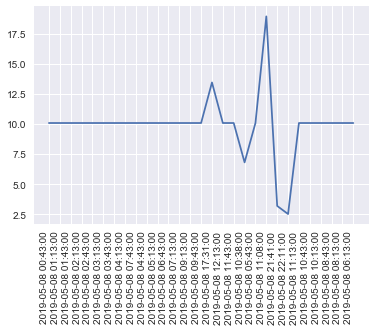

In [286]:
data_temp = data[data['day']=='Mon']
plt.xticks(rotation=90, ha='right')

plt.plot(data_temp['timestamp'],data_temp['average'])

# plt.savefig('temp.png', dpi=1000)

In [282]:
data.to_csv('data/data_final.csv')

In [283]:
data = pd.read_csv('data/data_final.csv')

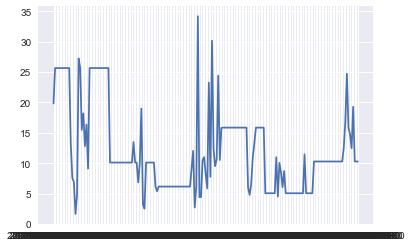

In [284]:
plt.plot(data['timestamp'],data['average'])
# plt.savefig('temp.png', dpi=1000)